In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("boston_house_price.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [3]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
X=df.drop('MEDV',axis=1)
Y=df['MEDV']

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [6]:
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(X_train,Y_train)
mutual_info

array([0.32499696, 0.16651574, 0.44443015, 0.01375936, 0.36600764,
       0.51379426, 0.2923581 , 0.24486262, 0.1792338 , 0.3092747 ,
       0.38653909, 0.17088599, 0.69916357])

In [7]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

LSTAT      0.699164
RM         0.513794
INDUS      0.444430
PTRATIO    0.386539
NOX        0.366008
CRIM       0.324997
TAX        0.309275
AGE        0.292358
DIS        0.244863
RAD        0.179234
B          0.170886
ZN         0.166516
CHAS       0.013759
dtype: float64

<AxesSubplot: >

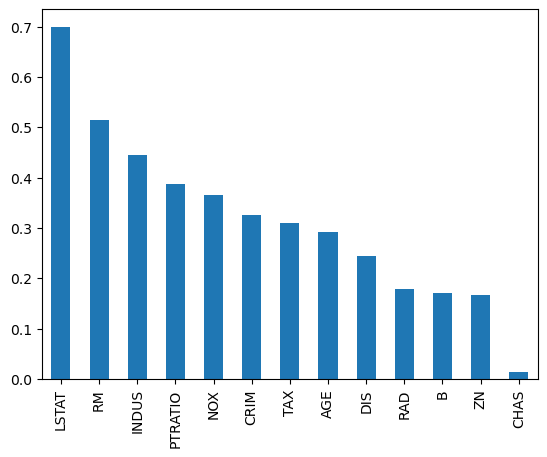

In [9]:
mutual_info.sort_values(ascending=False).plot.bar()

In [14]:
'''from sklearn.feature_selection import SelectKBest
sel_best_cols=SelectKBest(mutual_info,k=5)
sel_best_cols.fit(X_train,Y_train)
X_train.columns(sel_best_cols.get_support())'''

'from sklearn.feature_selection import SelectKBest\nsel_best_cols=SelectKBest(mutual_info,k=5)\nsel_best_cols.fit(X_train,Y_train)\nX_train.columns(sel_best_cols.get_support())'